In [2]:
pip install contextily

  Using cached contextily-1.2.0-py3-none-any.whl (16 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
  Using cached affine-2.3.1-py2.py3-none-any.whl (16 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)



In [4]:
pip install geovoronoi

  Using cached geovoronoi-0.4.0-py3-none-any.whl (21 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.4
    Uninstalling numpy-1.23.4:
      Successfully uninstalled numpy-1.23.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ishan\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [9]:

pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [254]:
pip install osmnx

     ---------------------------------------- 92.5/92.5 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import osmnx as ox
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords, coords_to_points

ModuleNotFoundError: No module named 'geovoronoi'

In [1]:
boundary = gpd.read_file("Texas_State_Boundary (2)/State.shp")
boundary.head()

NameError: name 'gpd' is not defined

<AxesSubplot: >

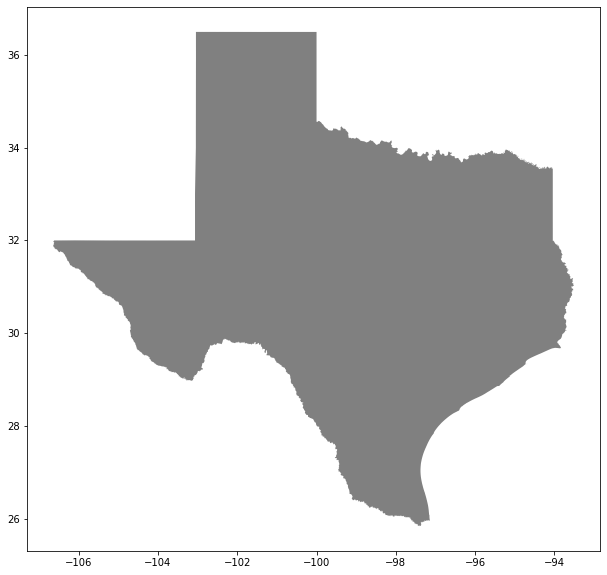

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
boundary.plot(ax=ax, color="grey")

In [12]:
b=b'\x00\x01\xad\x10\x00\x00\x10\xc1QUU\x91W\xc0\x10\x00\x00\x00\x00P?@\x10\xc1QUU\x91W\xc0\x10\x00\x00\x00\x00P?@|\x01\x00\x00\x00\x10\xc1QUU\x91W\xc0\x10\x00\x00\x00\x00P?@\xfe'
b.head()

AttributeError: 'bytes' object has no attribute 'head'

In [22]:
# Create Voronpi diagram for either subplot or for microplot, - better if uniform area,
# also need to check if we casn aggregate forest data based on subplot or microplot

In [23]:
pip install geopandas shapely

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd

In [28]:
df=pd.read_csv("TX_ASOS_Stations.csv")
df

,station,station_name,lat,lon,elev,begints,iem_network
0,ABI,Abilene,32.41063,-99.68209,544.9975,8/1/1946 0:00,TX_ASOS
1,GYF,Alaminos Canyon Block 857,26.12900,-94.89800,65.0000,12/27/2019 0:00,TX_ASOS
2,ALI,ALICE INTL AIRPORT,27.74089,-98.02694,54.0000,8/1/1946 0:00,TX_ASOS
3,E38,ALPINE,30.38400,-103.68400,1376.0000,6/6/2003 0:00,TX_ASOS
4,AMA,AMARILLO ARPT(AWOS),35.21936,-101.70592,1099.0000,3/1/1943 0:00,TX_ASOS
...,...,...,...,...,...,...,...
227,ARM,WHARTON REGIONAL ARPT,29.25428,-96.15439,30.0000,1/1/2005 0:00,TX_ASOS
228,SPS,WICHITA FALLS/SHEP,33.97860,-98.49280,314.0000,4/13/1942 0:00,TX_ASOS
229,INK,WINK/WINKLER CO.,31.78000,-103.20000,859.0000,8/1/1946 0:00,TX_ASOS
230,APY,Zapata,26.96879,-99.24891,128.6000,11/26/2008 0:00,TX_ASOS


In [29]:
from shapely.geometry import Point

# combine lat and lon column to a shapely Point() object
df['geometry'] = df.apply(lambda x: Point((float(x.lon), float(x.lat))), axis=1)

C:\Users\ishan\anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [35]:
df = gpd.GeoDataFrame(df, geometry='geometry')

In [36]:
df.to_file('MyGeometries.shp', driver='ESRI Shapefile')

C:\Users\ishan\AppData\Local\Temp\ipykernel_26728\4156409166.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file('MyGeometries.shp', driver='ESRI Shapefile')


In [37]:
gdf = gpd.read_file("MyGeometries.shp")
gdf.head()

,station,station_na,lat,lon,elev,begints,iem_networ,geometry
0,ABI,Abilene,32.41063,-99.68209,544.9975,8/1/1946 0:00,TX_ASOS,POINT (-99.68209 32.41063)
1,GYF,Alaminos Canyon Block 857,26.12900,-94.89800,65.0000,12/27/2019 0:00,TX_ASOS,POINT (-94.89800 26.12900)
2,ALI,ALICE INTL AIRPORT,27.74089,-98.02694,54.0000,8/1/1946 0:00,TX_ASOS,POINT (-98.02694 27.74089)
3,E38,ALPINE,30.38400,-103.68400,1376.0000,6/6/2003 0:00,TX_ASOS,POINT (-103.68400 30.38400)
4,AMA,AMARILLO ARPT(AWOS),35.21936,-101.70592,1099.0000,3/1/1943 0:00,TX_ASOS,POINT (-101.70592 35.21936)


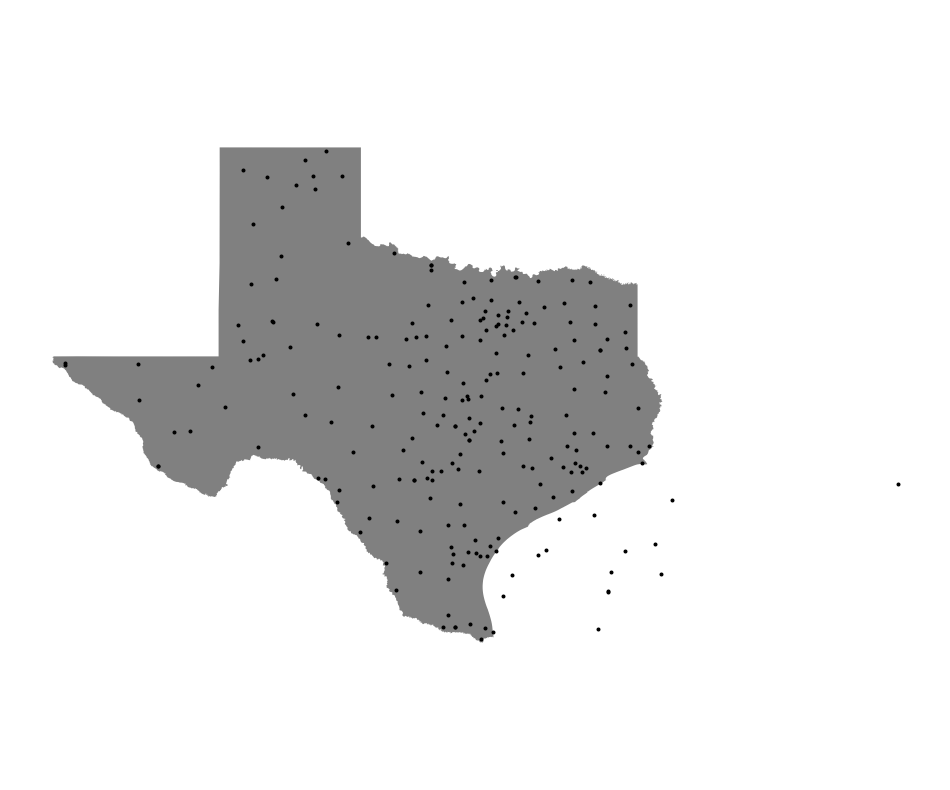

In [39]:
fig, ax = plt.subplots(figsize=(12, 10))
boundary.plot(ax=ax, color="gray")
gdf.plot(ax=ax, markersize=3.5, color="black")
ax.axis("off")
plt.axis("equal")
plt.show()

In [187]:
df1=pd.read_csv("firestations.csv")
df1

,FireDepartmentId,Name,TypeId,County,PhysicalCity,PhysicalState,PhysicalZipCode,PhysicalAddress1,PhysicalAddress2,Latitude,...,CharterId,CharterType,Legacy_VFDId,TESRS,IsAssistanceOnHold,EstablishmentYear,PrimaryProtectionAreaSqMile,CreatedDate,LastVerifiedDate,LastVerifiedBy
0,711.0,2604 VFD,VFD,Hill,Whitney,TX,76692.0,319 FM 2604,NaN,32.010900,...,41347601.0,Department,2510.0,NaN,0.0,1977.0,42.0,8/14/17 15:09,12/7/20 16:48,4328.0
1,1696.0,287 R/C Fire & Rescue,Combination/Part Paid,Navarro,Corsicana,TX,75109.0,9854 S Hwy 287,NaN,31.997800,...,800321607.0,Department,4177.0,NaN,0.0,2004.0,90.0,2/2/18 16:31,9/6/22 9:37,7936.0
2,246.0,356 VFD,VFD,Trinity,Trinity,TX,75862.0,12427 FM 356,NaN,30.870400,...,64714301.0,Department,985.0,NaN,0.0,1989.0,60.0,3/15/18 15:35,5/4/22 16:19,145.0
3,1032.0,84 East VFD,Combination/Part Paid,Anderson,Palestine,TX,75801.0,2254 ACR 385,NaN,31.746636,...,58085601.0,Department,2960.0,NaN,0.0,1982.0,95.0,4/6/18 13:19,11/12/20 9:56,829.0
4,1644.0,980 North VFD,Combination/Part Paid,San Jacinto,Huntsville,TX,77320.0,30 Lakeside Drive,NaN,30.860360,...,117550401.0,Department,4004.0,NaN,0.0,1990.0,17.0,5/4/16 12:16,3/1/21 14:40,281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
df1 = df1[df1['Longitude'].notna()]

In [189]:
df1

,FireDepartmentId,Name,TypeId,County,PhysicalCity,PhysicalState,PhysicalZipCode,PhysicalAddress1,PhysicalAddress2,Latitude,...,CharterId,CharterType,Legacy_VFDId,TESRS,IsAssistanceOnHold,EstablishmentYear,PrimaryProtectionAreaSqMile,CreatedDate,LastVerifiedDate,LastVerifiedBy
0,711.0,2604 VFD,VFD,Hill,Whitney,TX,76692.0,319 FM 2604,NaN,32.010900,...,41347601.0,Department,2510.0,NaN,0.0,1977.0,42.0,8/14/17 15:09,12/7/20 16:48,4328.0
1,1696.0,287 R/C Fire & Rescue,Combination/Part Paid,Navarro,Corsicana,TX,75109.0,9854 S Hwy 287,NaN,31.997800,...,800321607.0,Department,4177.0,NaN,0.0,2004.0,90.0,2/2/18 16:31,9/6/22 9:37,7936.0
2,246.0,356 VFD,VFD,Trinity,Trinity,TX,75862.0,12427 FM 356,NaN,30.870400,...,64714301.0,Department,985.0,NaN,0.0,1989.0,60.0,3/15/18 15:35,5/4/22 16:19,145.0
3,1032.0,84 East VFD,Combination/Part Paid,Anderson,Palestine,TX,75801.0,2254 ACR 385,NaN,31.746636,...,58085601.0,Department,2960.0,NaN,0.0,1982.0,95.0,4/6/18 13:19,11/12/20 9:56,829.0
4,1644.0,980 North VFD,Combination/Part Paid,San Jacinto,Huntsville,TX,77320.0,30 Lakeside Drive,NaN,30.860360,...,117550401.0,Department,4004.0,NaN,0.0,1990.0,17.0,5/4/16 12:16,3/1/21 14:40,281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,69.0,Yorktown VFD,VFD,DeWitt,Yorktown,TX,78164.0,107 W. Main,NaN,28.979400,...,0.0,City,283.0,103.0,0.0,NaN,176.0,12/13/17 17:33,2/22/22 19:32,7758.0
1836,1805.0,Ysleta del Sur Pueblo Fire Department,Combination/Part Paid,El Paso,El Paso,TX,79927.0,1100 Santos Sanchez suite B,NaN,31.687554,...,NaN,NaN,4541.0,NaN,1.0,NaN,NaN,5/28/14 16:20,1/5/21 16:14,6554.0
1837,623.0,Zapata County Fire Department,Combination/Part Paid,Zapata,Zapata,TX,78076.0,305 FM 496 E,NaN,26.905600,...,0.0,County,2374.0,NaN,0.0,NaN,1059.0,9/19/14 15:34,7/3/22 15:38,439.0
1838,1453.0,Zavalla VFD,VFD,Angelina,Zavalla,TX,75980.0,174 park Street,NaN,31.158442,...,4032301.0,Department,3546.0,NaN,0.0,1977.0,180.0,8/3/15 12:18,12/2/20 11:34,281.0


In [190]:
from shapely.geometry import Point

# combine lat and lon column to a shapely Point() object
df1['geometry'] = df1.apply(lambda x: Point((float(x.Longitude), float(x.Latitude))), axis=1)

C:\Users\ishan\anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\ishan\AppData\Local\Temp\ipykernel_26728\1584667228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['geometry'] = df1.apply(lambda x: Point((float(x.Longitude), float(x.Latitude))), axis=1)


In [191]:
df1 = gpd.GeoDataFrame(df1, geometry='geometry')
df1.to_file('MyGeometries3.shp', driver='ESRI Shapefile')

C:\Users\ishan\AppData\Local\Temp\ipykernel_26728\928117018.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df1.to_file('MyGeometries3.shp', driver='ESRI Shapefile')


In [192]:
gdf = gpd.read_file("MyGeometries3.shp")
gdf.head()

,FireDepart,Name,TypeId,County,PhysicalCi,PhysicalSt,PhysicalZi,PhysicalAd,Physical_1,Latitude,...,CharterTyp,Legacy_VFD,TESRS,IsAssistan,Establishm,PrimaryPro,CreatedDat,LastVerifi,LastVeri_1,geometry
0,711.0,2604 VFD,VFD,Hill,Whitney,TX,76692.0,319 FM 2604,None,32.010900,...,Department,2510.0,NaN,0.0,1977.0,42.0,8/14/17 15:09,12/7/20 16:48,4328.0,POINT (-97.37400 32.01090)
1,1696.0,287 R/C Fire & Rescue,Combination/Part Paid,Navarro,Corsicana,TX,75109.0,9854 S Hwy 287,None,31.997800,...,Department,4177.0,NaN,0.0,2004.0,90.0,2/2/18 16:31,9/6/22 9:37,7936.0,POINT (-96.22720 31.99780)
2,246.0,356 VFD,VFD,Trinity,Trinity,TX,75862.0,12427 FM 356,None,30.870400,...,Department,985.0,NaN,0.0,1989.0,60.0,3/15/18 15:35,5/4/22 16:19,145.0,POINT (-95.20440 30.87040)
3,1032.0,84 East VFD,Combination/Part Paid,Anderson,Palestine,TX,75801.0,2254 ACR 385,None,31.746636,...,Department,2960.0,NaN,0.0,1982.0,95.0,4/6/18 13:19,11/12/20 9:56,829.0,POINT (-95.53708 31.74664)
4,1644.0,980 North VFD,Combination/Part Paid,San Jacinto,Huntsville,TX,77320.0,30 Lakeside Drive,None,30.860360,...,Department,4004.0,NaN,0.0,1990.0,17.0,5/4/16 12:16,3/1/21 14:40,281.0,POINT (-95.31218 30.86036)


In [193]:
len(gdf)

1840

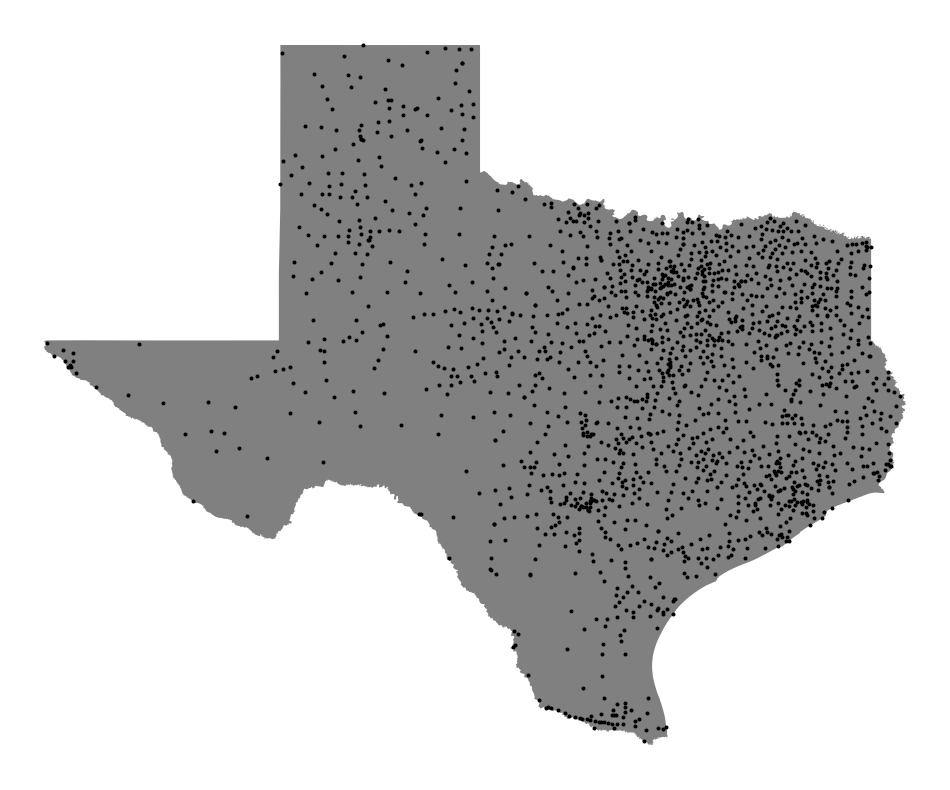

In [194]:
fig, ax = plt.subplots(figsize=(12, 10))
boundary.plot(ax=ax, color="gray")
gdf.plot(ax=ax, markersize=3.5, color="black")
ax.axis("off")
plt.axis("equal")
plt.show()

In [225]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
area = world[world.name == "Texas"]

In [226]:
area.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [213]:
gdf.crs = "EPSG:4326"

In [214]:
boundary = boundary.to_crs(epsg=3395)
gdf_proj = gdf.to_crs(boundary.crs)

In [215]:
boundary_shape = cascaded_union(boundary.geometry)
coords = points_to_coords(gdf_proj.geometry)

C:\Users\ishan\AppData\Local\Temp\ipykernel_26728\3398700947.py:1: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  boundary_shape = cascaded_union(boundary.geometry)


In [216]:
boundary_shape = cascaded_union(boundary.geometry)
coords = points_to_coords(gdf_proj.geometry)

C:\Users\ishan\AppData\Local\Temp\ipykernel_26728\3398700947.py:1: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  boundary_shape = cascaded_union(boundary.geometry)


In [217]:
coords

array([[-10839624.09650422,   3742094.091891  ],
       [-10711962.90446249,   3740382.72584676],
       [-10598105.32927914,   3594008.55936776],
       ...,
       [-11051075.46926604,   3092352.19197852],
       [-10510940.16423717,   3631237.73013268],
       [-10997664.37758343,   3698188.23113266]])

In [218]:
boundary['geometry']

0    POLYGON ((-11187636.512 4344204.435, -11187008...
Name: geometry, dtype: geometry

In [239]:
poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords,boundary_shape,return_unassigned_points=True,
                                                                       per_geom=True)

In [240]:
print(pts)

{0: [1661], 1: [1293], 2: [1720], 3: [1626], 4: [391], 5: [617], 6: [1318], 7: [1629], 8: [158], 9: [1762], 10: [140], 11: [254], 12: [1496], 13: [1623], 14: [1005], 15: [1508], 16: [27], 17: [415], 18: [337], 19: [559], 20: [1836], 21: [594], 22: [524], 23: [1450], 24: [1530], 25: [753], 26: [1087], 27: [526], 28: [301], 29: [1260], 30: [946], 31: [255], 32: [1525], 33: [1345], 34: [1350], 35: [789], 36: [776], 37: [495], 38: [1687], 39: [386], 40: [434], 41: [1691], 42: [523], 43: [1622], 44: [1375], 45: [1738], 46: [1698], 47: [1795], 48: [282], 49: [13], 50: [713], 51: [728], 52: [1705], 53: [1099], 54: [1783], 55: [958], 56: [161], 57: [612], 58: [1363], 59: [569], 60: [1582], 61: [225], 62: [482], 63: [237], 64: [1448], 65: [982], 66: [198], 67: [1652], 68: [67], 69: [129], 70: [1016], 71: [1569], 72: [644], 73: [635], 74: [480], 75: [1805], 76: [1312], 77: [1821], 78: [1135], 79: [1682], 80: [672], 81: [484], 82: [1837], 83: [721], 84: [564], 85: [1358], 86: [791], 87: [931], 88

C:\Users\ishan\anaconda3\envs\geo_env\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\ishan\anaconda3\envs\geo_env\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


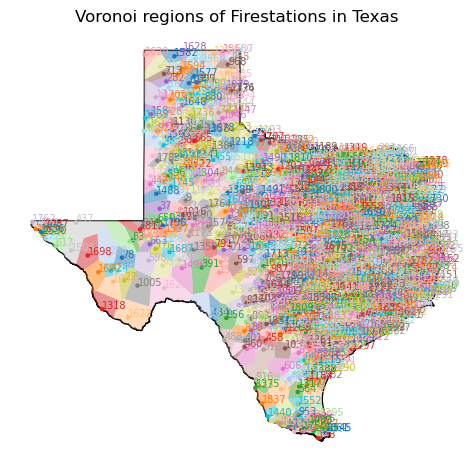

In [241]:
fig, ax = subplot_for_map()
plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, coords, pts,point_labels=list(map(str, range(len(coords)))))
ax.set_title('Voronoi regions of Firestations in Texas')
plt.tight_layout()
plt.show()

In [227]:
polys_shapes2, pts2 = voronoi_regions_from_coords(coords, boundary_shape, per_geom=False)

In [231]:
COUNTRY = "Texas"

C:\Users\ishan\anaconda3\envs\geo_env\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\ishan\anaconda3\envs\geo_env\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


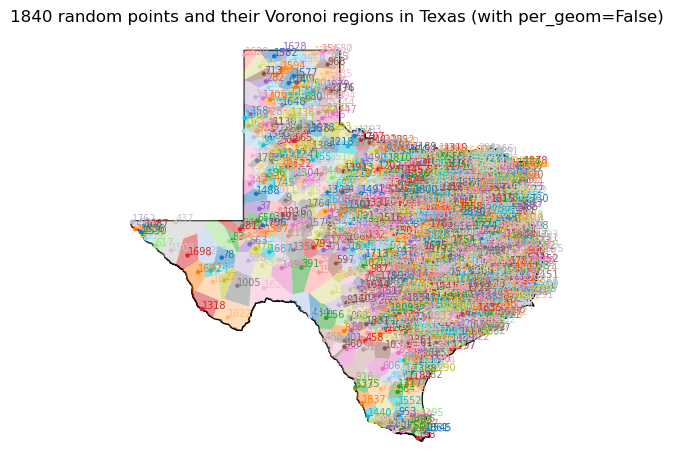

In [235]:
fig, ax = subplot_for_map()

plot_voronoi_polys_with_points_in_area(ax, boundary_shape, polys_shapes2, coords, pts2,
                                       point_labels=list(map(str, range(len(coords)))))

ax.set_title('%d random points and their Voronoi regions in %s (with per_geom=False)' % (len(coords), C))

plt.tight_layout()
#plt.savefig('random_points_across_italy_per_geom_false.png')
plt.show()

In [243]:
plot_voronoi_polys_with_points_in_area(
    ax,
    boundary_shape,
    poly_shapes,
    coords,
    #poly_to_pt_assignments=None,
    area_color='white',
    area_edgecolor='black',
    voronoi_and_points_cmap='tab20',
    voronoi_color=None,
    voronoi_edgecolor=None,
    points_color=None,
    points_markersize=5,
    points_marker='o',
    voronoi_labels=None,
    voronoi_label_fontsize=10,
    voronoi_label_color=None,
    point_labels=None,
    point_label_fontsize=7,
    point_label_color=None,
    plot_area_opts=None,
    plot_voronoi_opts=None,
    plot_points_opts=None,
)

C:\Users\ishan\anaconda3\envs\geo_env\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\ishan\anaconda3\envs\geo_env\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


In [236]:
# how to find closest region

C:\Users\ishan\anaconda3\envs\geo_env\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\ishan\anaconda3\envs\geo_env\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


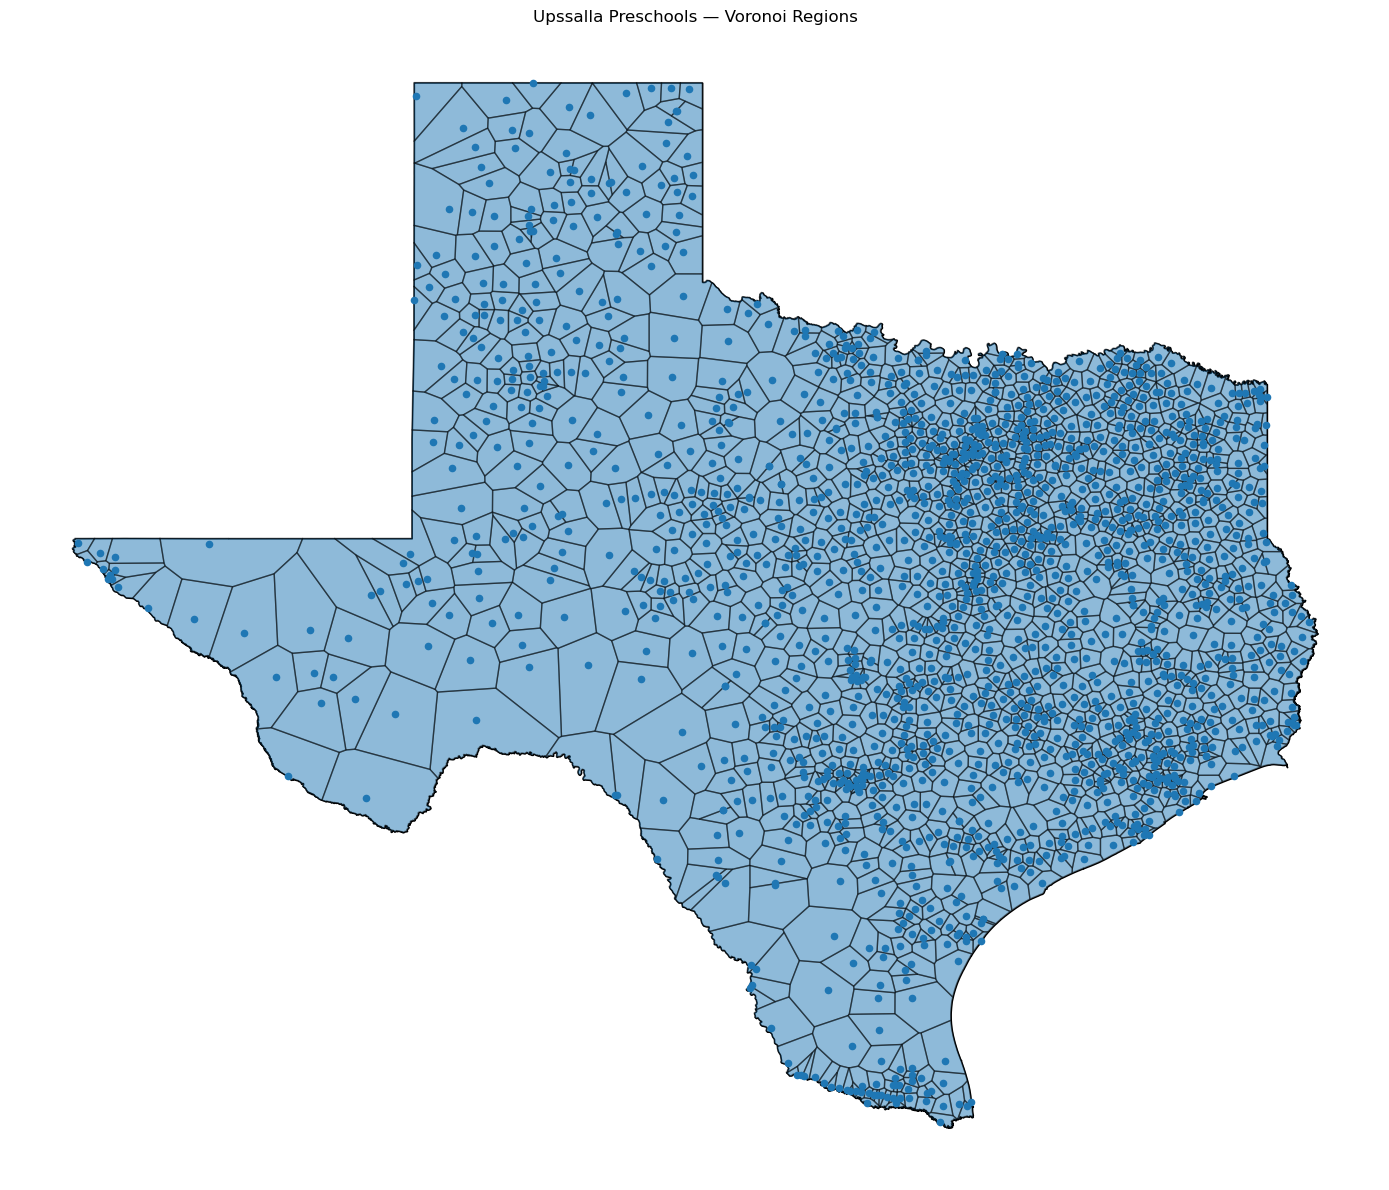

In [246]:
fig, ax = plt.subplots(figsize=(14,12))
plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, coords, poly_to_pt_assignments,
 voronoi_and_points_cmap="tab20c",
 points_markersize=20)
ax.set_title("Upssalla Preschools — Voronoi Regions")
ax.axis("off")
plt.tight_layout()
plt.show()

C:\Users\ishan\anaconda3\envs\geo_env\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\ishan\anaconda3\envs\geo_env\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


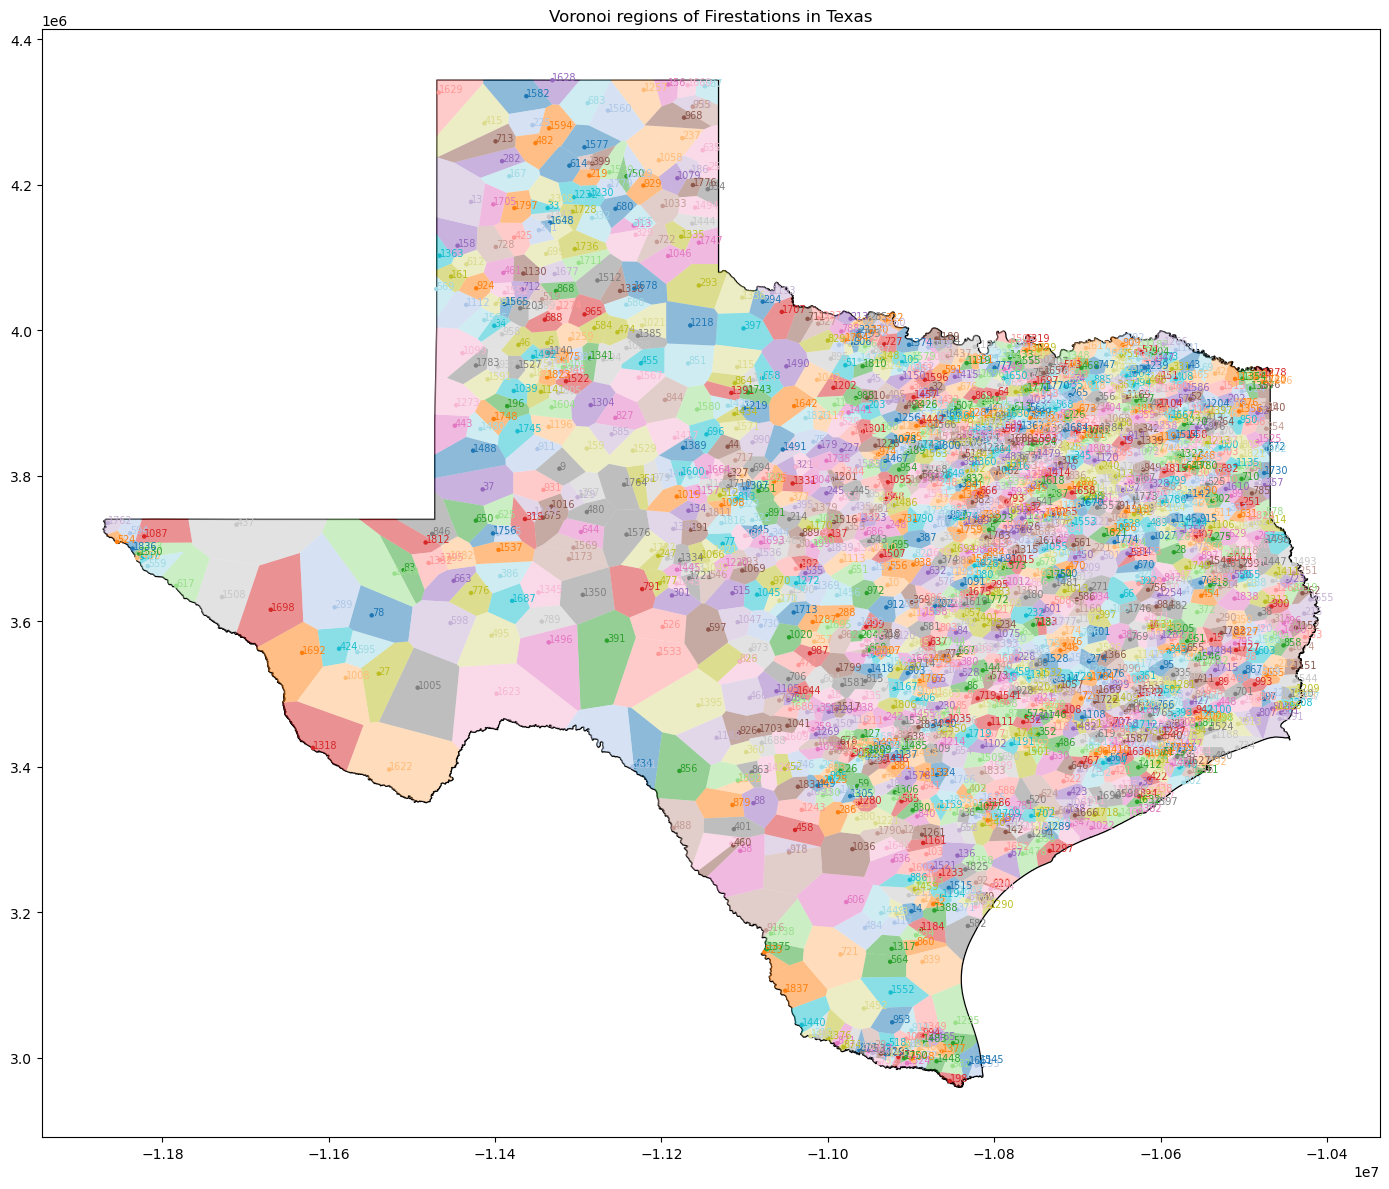

In [247]:
fig, ax = plt.subplots(figsize=(14,12))
plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, coords, pts,point_labels=list(map(str, range(len(coords)))))
ax.set_title('Voronoi regions of Firestations in Texas')
plt.tight_layout()
plt.show()

In [262]:
G = ox.graph_from_polygon(boundary_shape, network_type='all_private')
#gdf_all_streets =  ox.graph_to_gdfs(G, nodes=False, edges=True,node_geometry=False, fill_edge_geometry=True)

CRSError: Invalid projection: +proj=utm +zone=-1851738 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs: (Internal Proj Error: proj_create: Error 1027 (Invalid value for an argument): utm: Invalid value for zone)

In [264]:
for i_pt in poly_to_pt_assignments:
    print('#%d: %.2f, %.2f' % (i_pt, pts[i_pt].x, pts[i_pt].y))

In [265]:
from geovoronoi import calculate_polygon_areas

In [293]:
x=poly_shapes
for i in range(len(poly_shapes)):
    poly_shapes[i].crs="EPSG:4326"

In [299]:
s=0
for i in range(len(poly_shapes)):
    s+=calculate_polygon_areas(poly_shapes)[i]
    print(s)

495906988.069983
732904489.3310215
771478976.8047355
824349109.6612937
7967881478.673191
10428950517.025381
15198404947.571762
17531991401.078457
19439656821.094536
19812179800.745415
19987493760.941196
20314120852.04199
26018461233.12078
36366633466.52758
44436055110.216995
49471040891.46356
53138176623.94676
57276978058.79084
57413349265.47113
58298457562.95429
58468528470.400635
59095425015.770134
59301003630.18344
59340631255.746414
59411579860.9011
60336197329.87703
62388978182.15327
64872642425.5419
66257272089.99417
66599906435.29319
66865205890.86588
67131643117.89312
67515890409.94923
69717348363.81967
73400750153.55676
75428496645.35909
77183804534.14735
81259600094.87143
83041680304.89874
84951552064.71696
87757913628.95477
91462015890.65904
91849338471.26628
101412355756.75087
102371269945.41956
104549559954.64001
111410236095.34789
111839093444.01682
113624305258.93752
117846447342.44914
119967634994.63258
121488211836.69283
122857401294.6102
125549079748.83365
12670043822

466158674095.4244
466439545829.93866
466651990471.4144
466974870675.00885
467184972119.6374
467460535995.9437
467749771707.1249
468053032192.7061
469248587554.2364
470040830187.9363
470693911363.49774
471969164897.2352
472422463240.7394
472944396706.9095
473118532868.3059
473646214221.05066
474472556839.35376
475147323561.10126
475589191650.3211
475953319008.4702
476516811437.38385
476809987817.573
477092777420.2048
478056075352.64233
480336913143.27856
480554726224.6725
481068083739.1263
481376779769.09595
481539620629.10406
481949236413.90955
482238475384.81854
483105114408.0209
484288800485.7657
485569596633.7106
485904444640.3448
486211416531.0923
486458528350.81714
486820961362.8605
487005024149.36053
487143087344.8497
487272919407.3505
487499051584.9897
487823033718.82874
488094934894.56903
488304466920.4886
488600941481.7963
488802767502.5357
488957319964.7809
489210962597.6534
489468124509.4868
489850696434.7997
490059771032.96954
490245981141.86755
490371373260.9959
4904510488

665740258848.8009
665859714402.4801
666025326853.093
666246528831.9188
666544222986.4124
666972998630.3545
667261639304.7615
667785626079.2319
668078257725.6053
668439129079.5848
669027846735.783
669359261854.0441
669646746135.5458
670038450929.0482
670196891392.7933
670379656129.507
670472284279.0658
670567632633.327
670692236804.5682
670849465502.1348
670974961547.1094
671574835435.4581
671936703562.0236
672037962922.8623
672248346940.1873
672550556505.9133
672696684094.1632
672838542094.8419
673037767960.2355
673285331846.3519
673659932770.11
673754681377.5085
673940829146.3661
674435441719.5125
674663903166.1918
675459982950.2411
675944030050.2268
676429607884.0978
677150322037.3917
677401376137.145
677805238982.179
678069904478.0033
678137188362.7091
678639376185.2281
678747274754.1023
679218955834.619
679782784331.3511
680141122097.552
680381363627.3531
680943294361.6382
681209669889.0569
681439441207.3677
681669239982.5723
682131544411.8733
682532108698.5842
682993899264.129
683

813161528458.8992
813782665083.226
814066635309.3096
814207583422.9015
814466221812.853
814604522500.5107
815844441086.2535
816364651311.882
817008145952.662
817792723156.6938
818140233246.3644
818443625300.8599
819039187734.3077
820052585303.9039
820552978353.3453
820958543322.5818
821471384314.4391
821622526205.5566
821965560385.2296
822300363779.4788
822399567047.0048
822656646170.1694
822942504405.2853
823032881342.5315
823200915589.6176
823331205911.1488
823571290433.1387
823677472149.0651
823796027810.5931
824054539317.7322
824295079429.1155
824470232193.3315
824587034822.5981
824703926980.7396
824773731358.9044
825000213539.1705
825579369804.9092
825734833119.6399
826114039928.1028
826790396094.7404
828664367521.2749
829780506187.1862
830666410750.6265
831626133695.0203
832418450503.2794
834287277854.5946
834973912855.6368
835625201899.369
837394735785.6718
838078472222.3212
838323470350.7932
838543598437.6945
838758688557.6714
838931058132.9103
839169578611.0245
839447619993.67

In [300]:
s

951491607097.8993

In [ ]:
for i in range(1000000):
    for j in range(600):